In [1]:
!pip install kagglehub


In [2]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download(
    "bhanupratapbiswas/house-price-prediction"
)
print(path)


100%|██████████| 132k/132k [00:00<00:00, 40.5MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/bhanupratapbiswas/house-price-prediction/versions/1


In [3]:
os.listdir(path)


['data.csv']

In [5]:
df = pd.read_csv(os.path.join(path, "data.csv"))
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

Basic Inspection

In [6]:
df.shape


(4600, 18)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.describe()


price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

EDA

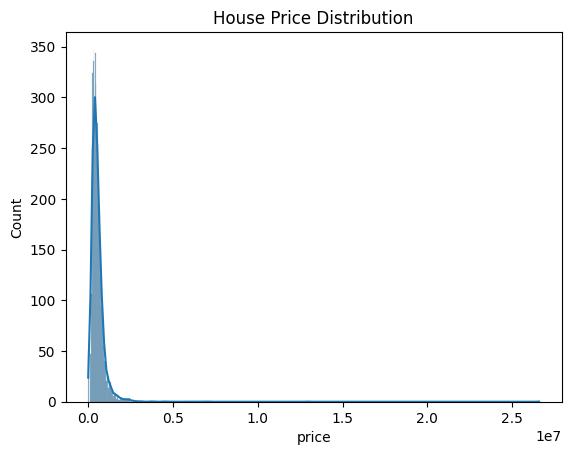

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], kde=True)
plt.title("House Price Distribution")
plt.show()

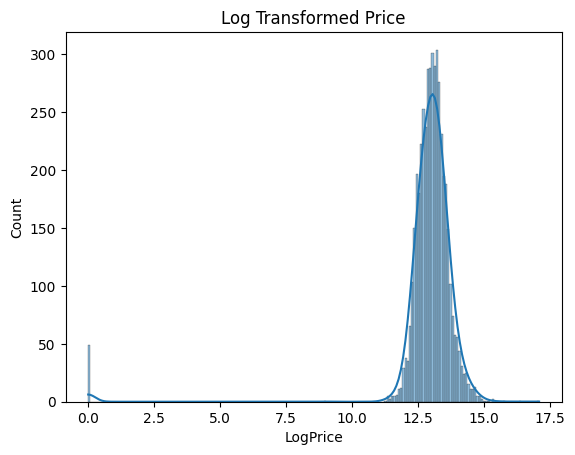

In [12]:
import numpy as np

df['LogPrice'] = np.log1p(df['price'])

sns.histplot(df['LogPrice'], kde=True)
plt.title("Log Transformed Price")
plt.show()

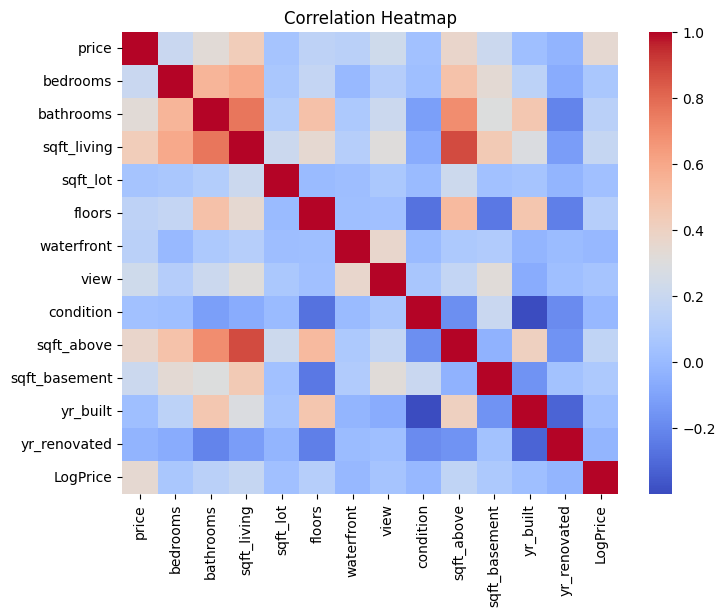

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Handle Missing Values

In [15]:
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
LogPrice         0
dtype: int64

Encoding Categorical Features

In [16]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98155  statezip_WA 98166  \
0     0          3        1340  ...              False              False   
1     4          5        3370  ...              False              False   
2     0          4        1930  ...              False              False   
3     0          4        1000  ...              False              False   
4     0          4        1140  ...              False              False   

   statezip_WA 98168  statezip_WA 98177  statezip_WA 98178  statezip_WA 98188  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   statezip_WA 98198  statezip_WA 98199  statezip_WA 98288  statezip_WA 98354  
0              False              False              False              False  
1              False              False              False              False  
2              False              False              False              False  
3              False              False              False              False  
4              False              False              False              False  

[5 rows x 4726 columns]

Feature–Target Split

In [18]:
X = df_encoded.drop(columns=['price', 'LogPrice'])
y = df_encoded['LogPrice']

Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#Train Models

linear regression

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)


Evaluation Metrics

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.4f}, MAE: {mae:.4f}")



In [27]:
evaluate("Linear Regression", y_test, lr_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("Gradient Boosting", y_test, gbr_pred)


Linear Regression → RMSE: 1.3705, MAE: 0.4167
Random Forest → RMSE: 1.3999, MAE: 0.3326
Gradient Boosting → RMSE: 1.3954, MAE: 0.4755


Residual Analysis

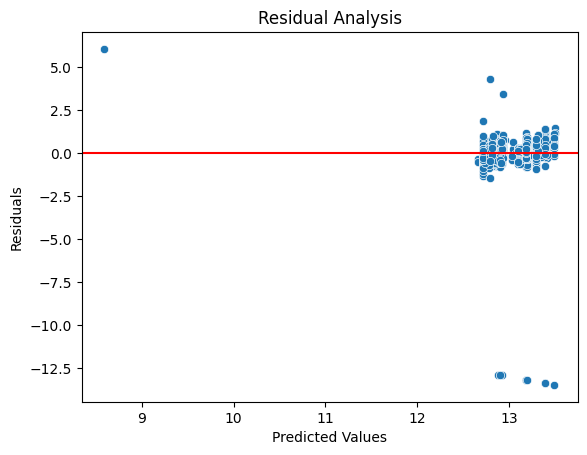

In [28]:
residuals = y_test - gbr_pred

sns.scatterplot(x=gbr_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


Save Best Model

In [29]:
import joblib

joblib.dump(gbr, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Inference Cell

In [30]:
model = joblib.load("house_price_model.pkl")
scaler = joblib.load("scaler.pkl")

# Example input (replace values as per dataset features)
sample = X.iloc[0:1]
sample_scaled = scaler.transform(sample)

pred_log_price = model.predict(sample_scaled)
pred_price = np.expm1(pred_log_price)

print("Predicted House Price:", int(pred_price[0]))


Predicted House Price: 5380


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
